# Entrega 1 - Actividad 1

Alumno: Víctor David Silva

Cohorte: 14

Actividad 1: Redactar un pequeño informe, justificando cada uno de los pasos que se
plantean y las conclusiones que se obtienen.
1) Elegir una serie univariables, pueden tomarla del repositorio GitHub [https://github.com/jbrownlee/Datasets.git] que se compartió en la clase 2, de otro repositorio que indiquen o series propias con las que ya trabajen. Describir todos los datos que considere relevantes para un análisis.
2) Descomponer dicha serie usando un modelo ETS aditivo, y comparar la tendencia que se obtiene con el filtro de Hodrick-Prescott y realizar modelos de suavizado exponencial de 1ero, 2ndo y tercer orden. Calcular las funciones ACF y PACF.
3) Hacer la autocorrelación para distintos valores de rezago, hacer el correlograma.


### Actividad 1.1

De los datasets propuestos se ha elegido es monthly-car-sales.

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import statsmodels.tsa.stattools as sts

In [2]:
# url del dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

# Crear un dataframe de la url
df = pd.read_csv(url)

In [3]:
# Visualizar el dataframe
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


Tiene 108 filas, con 2 columnas, una de ellas el mes y año, y la otra las ventas.

In [4]:
# Infor del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


No hay datos faltantes y se observa el tipo de dato de cada columna.

In [5]:
# Descripción del dataframe
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


Se observan la cantidad de filas, la media de estas, la desviación estandar, el valor mínimo, el valor méximo y los cuartiles.

### Actividad 1.2

<Axes: >

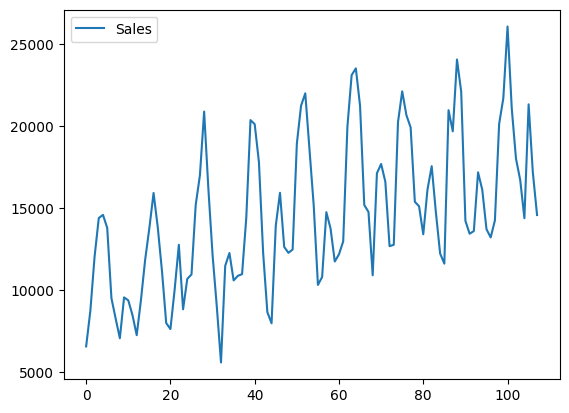

In [6]:
# Grafica del dataframe
df.plot()

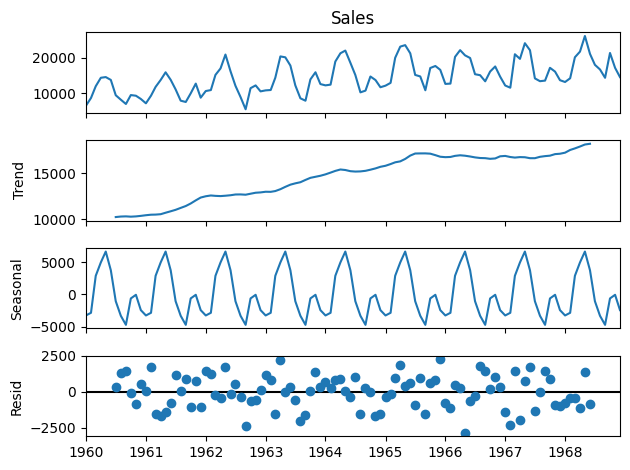

In [7]:
# Descomponer usando un modelo ETS aditivo
from statsmodels.tsa.seasonal import seasonal_decompose

# Cambiar el tipo de la columna a datetime
df['Month'] = pd.to_datetime(df['Month'])

# Convertir Month en un índice de fechas
df.set_index('Month', inplace = True)

# Con función seasonal_decompose, usando de modelo aditivo, separar la columna en tendencia, seasonal y resid.
result = seasonal_decompose(df['Sales'], model = 'additive')
result.plot();

Con seasonal_decompose se puede observa la tendencia, la cual es creciente,  seasonal muestra el patrón que se repite de forma periódica, y tenemos el ruido.

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Se obtiene el ciclo y la tendencia al usar el filtro
gdp_cycle, gdp_trend = hpfilter(df['Sales'], lamb = 1600)

Text(0, 0.5, 'Sales')

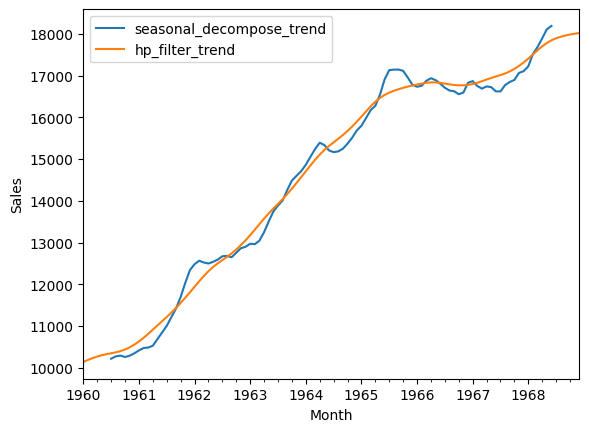

In [9]:
result.trend.plot();
gdp_trend.plot();
plt.legend(['seasonal_decompose_trend','hp_filter_trend'])
plt.xlabel('Month')
plt.ylabel('Sales')

Se observa que ambas siguen la misma tendencia, pero en el caso de hpfilter es más suavizada.

#### SES (Simple Exponential Smoothing)

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Hasta que resago quiero que se tenga en cuenta al calcular el alpha
span = 12

# Depende del span
alpha = 2/(span + 1)

# Crea una columna EWMA
df['SES'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
df.head()

,Sales,SES
Month,,
1960-01-01,6550,6550.000000
1960-02-01,8728,6885.076923
1960-03-01,12026,7675.988166
1960-04-01,14395,8709.682294
1960-05-01,14587,9613.885018


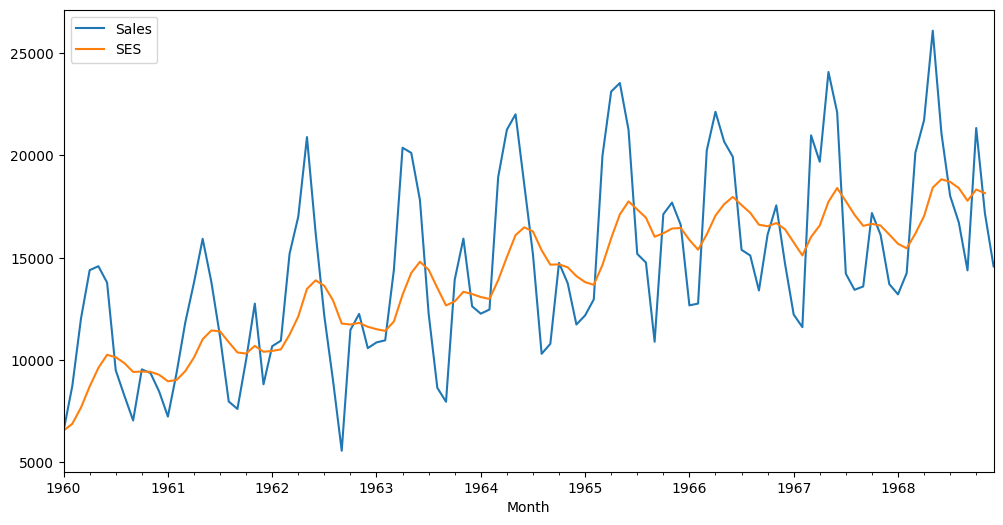

In [12]:
df[['Sales', 'SES']].plot(figsize=(12,6));

Si bien sigue un poco la forma, se ajusta mal a la curva de Sales debido a que Sales fluctua significativamente en el tiempo.

#### DES (Double Exponential Smoothing)

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing;

df['DESadd'] = ExponentialSmoothing(df['Sales'], trend = 'add').fit().fittedvalues.shift(-1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [14]:
df['DESmul'] = ExponentialSmoothing(df['Sales'], trend = 'mul').fit().fittedvalues.shift(-1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [15]:
df.head()

,Sales,SES,DESadd,DESmul
Month,,,,
1960-01-01,6550,6550.000000,6455.512268,6502.939358
1960-02-01,8728,6885.076923,8600.303214,8625.473235
1960-03-01,12026,7675.988166,11892.878026,11883.542237
1960-04-01,14395,8709.682294,14266.744861,14232.492043
1960-05-01,14587,9613.885018,14469.686061,14433.198339


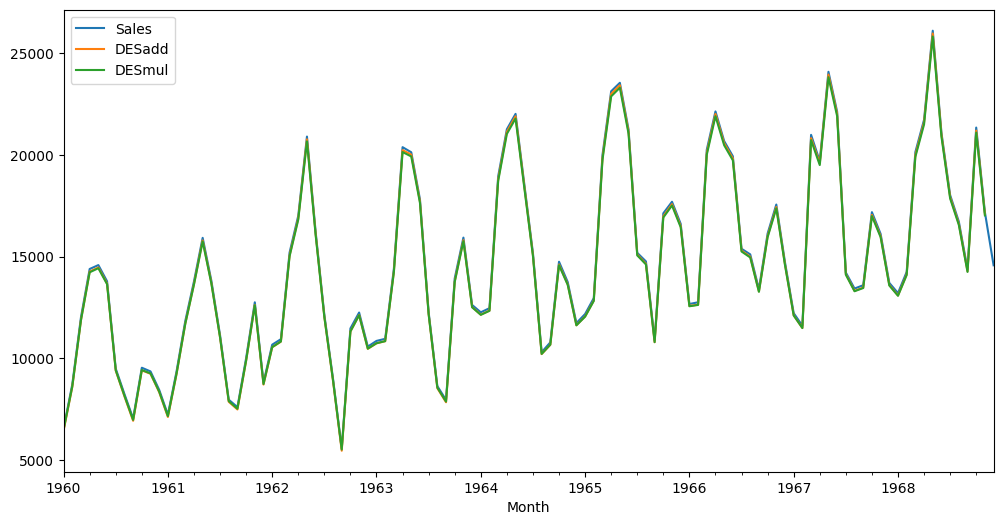

In [16]:
df[['Sales','DESadd','DESmul']].plot(figsize=(12,6));

Para observar de forma más detallada, se toma solo un año.

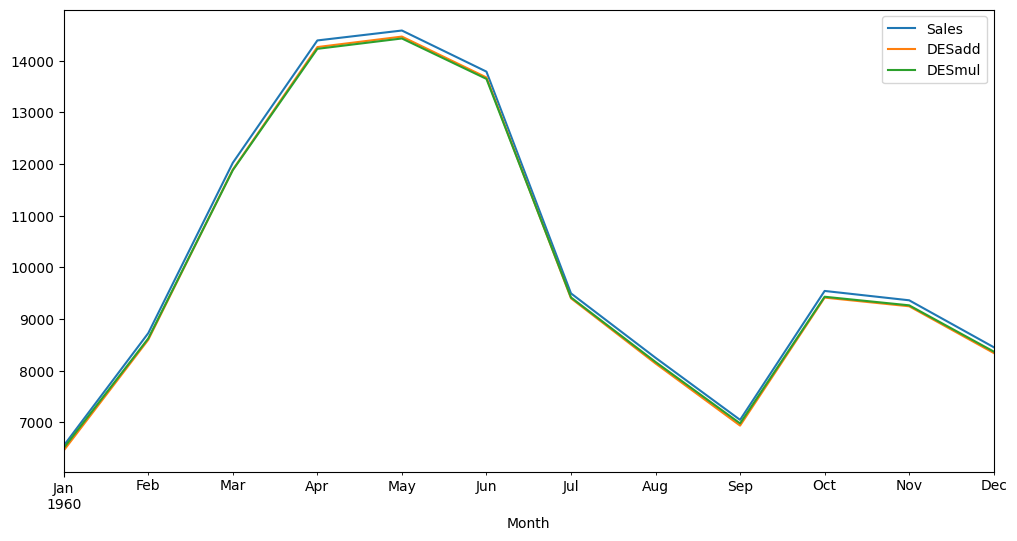

In [17]:
df[['Sales','DESadd','DESmul']].iloc[:12].plot(figsize=(12,6));

Se observa que para DES se ajustan bien la multiplicativa y la aditiva. Se ajusta bien debido a que las ventas siguen un patrón predecible.

#### TES (Triple Exponential Smoothing)

In [18]:
df['TESadd'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
df['TESmul'] = ExponentialSmoothing(df['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


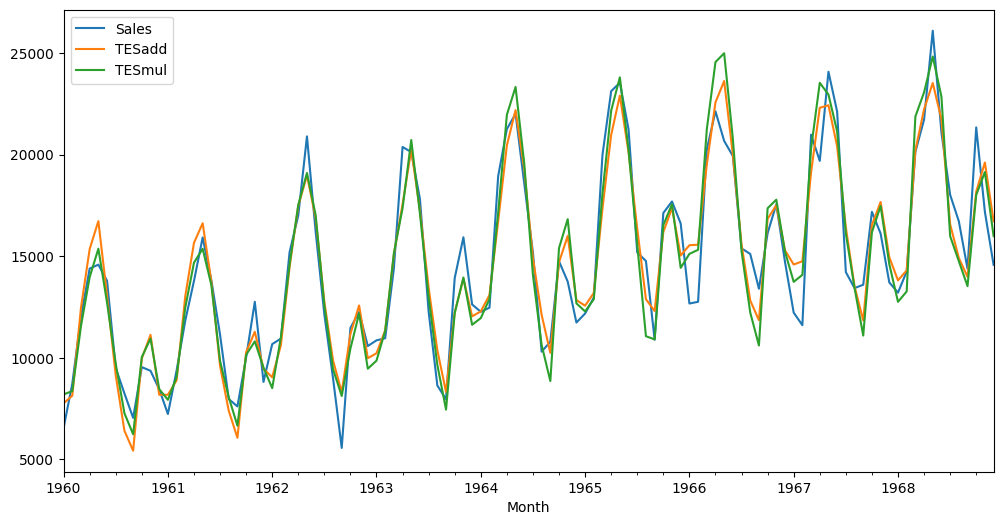

In [20]:
df[['Sales','TESadd','TESmul']].plot(figsize = (12,6));

Para observar de forma más detallada, se toma solo un año.

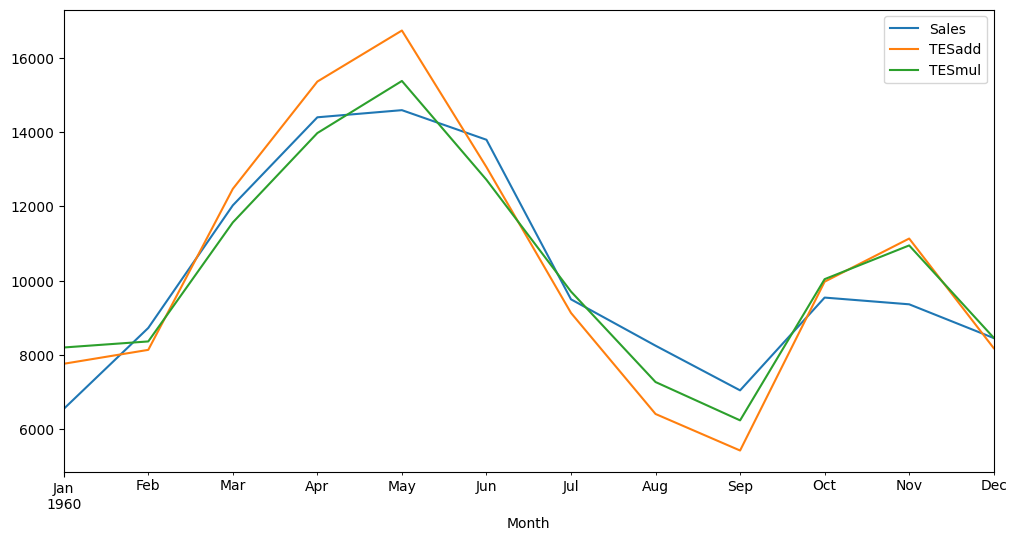

In [21]:
df[['Sales','TESadd','TESmul']].iloc[:12].plot(figsize = (12,6));

Se observa que la TES multiplicativa es la que mejor se ajusta.

#### Comparación entre Exponential Smoothing

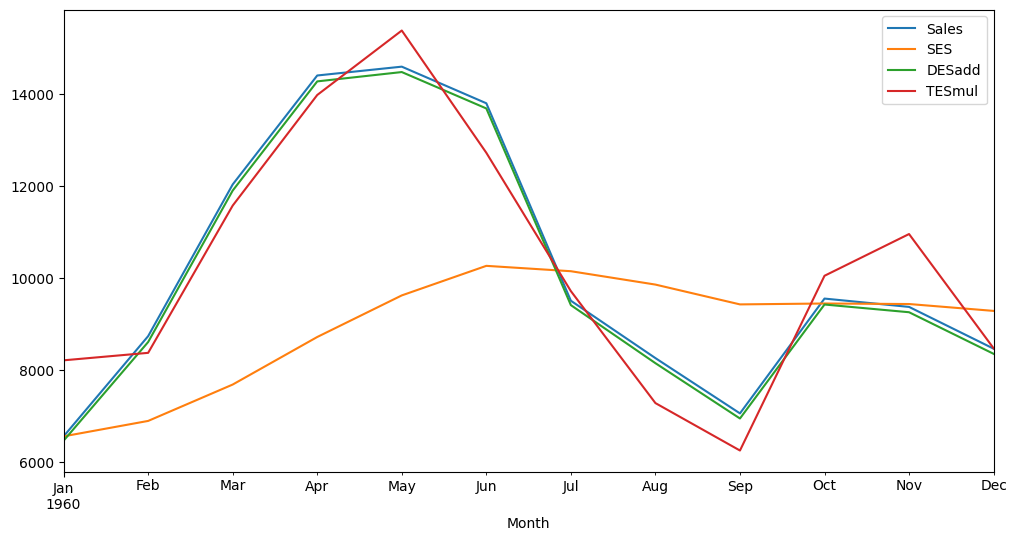

In [22]:
# Comparación entre modelos de suavizado exponencial
df[['Sales','SES','DESadd','TESmul']].iloc[:12].plot(figsize = (12,6));

Se observa que la que mejor ajusta es el suavizado exponencial de segundo orden.

### Actividad 1.3

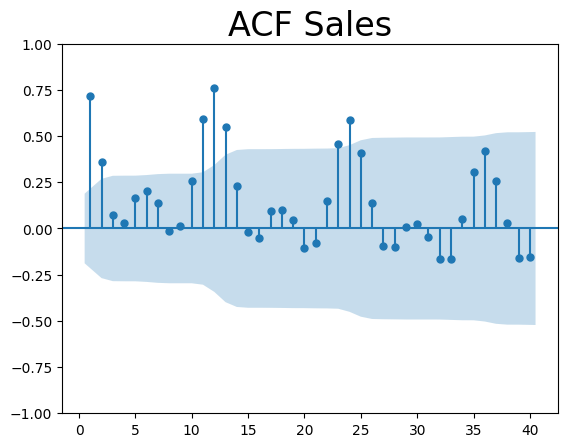

In [23]:
import statsmodels.graphics.tsaplots as sgt


sgt.plot_acf(df['Sales'], lags = 40, zero = False)
plt.title('ACF Sales', size = 24)
plt.show()


Se observa que la mayoría de los datos están por debajo de la significancia. Hay autocorrelación significativa en pocos, llega rápidamente con una tendencia descente a no ser ninguna significativa, por lo que no hay correlación con los anteriores.

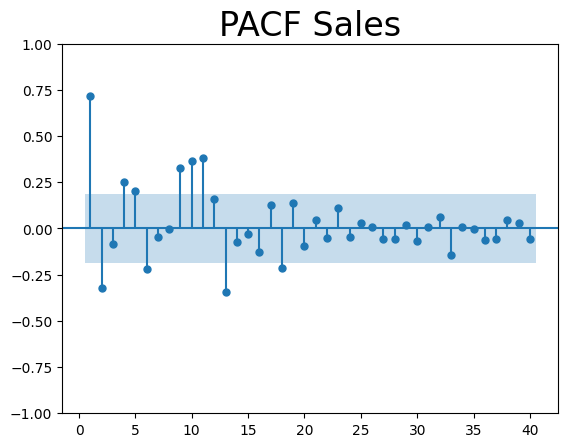

In [24]:
sgt.plot_pacf(df['Sales'], lags = 40, zero = False)
plt.title('PACF Sales', size = 24)
plt.show()

Al aplicar la parcial eliminar las influencias intermedias y solo se queda con las directas. Se observa que las ventas de un día se ven afectadas por las ventas del día anterior, 2, 4, 5, 6 días anteriores y algunos días de la semana anterior, el resto no es significativo.